In [137]:
# Importing libraries
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import streamlit as st
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
import matplotlib.ticker as ticker

In [138]:
# Dictionaries for file paths
data_paths = {
    'train': {
        1: r"C:/Users/JAHNAVI/Desktop/archive/CMaps/train_FD001.txt",
        2: r"C:/Users/JAHNAVI/Desktop/archive/CMaps/train_FD002.txt",
        3: r"C:/Users/JAHNAVI/Desktop/archive/CMaps/train_FD003.txt",
        4: r"C:/Users/JAHNAVI/Desktop/archive/CMaps/train_FD004.txt"
    },
    'test': {
        1: r"C:\Users\JAHNAVI\Desktop\archive\CMaps\test_FD001.txt",
        2: r"C:\Users\JAHNAVI\Desktop\archive\CMaps\test_FD002.txt",
        3: r"C:\Users\JAHNAVI\Desktop\archive\CMaps\test_FD003.txt",
        4: r"C:\Users\JAHNAVI\Desktop\archive\CMaps\test_FD004.txt"
    },
    'rul': {
        1: r"C:\Users\JAHNAVI\Desktop\archive\CMaps\RUL_FD001.txt",
        2: r"C:\Users\JAHNAVI\Desktop\archive\CMaps\RUL_FD002.txt",
        3: r"C:\Users\JAHNAVI\Desktop\archive\CMaps\RUL_FD003.txt",
        4: r"C:\Users\JAHNAVI\Desktop\archive\CMaps\RUL_FD004.txt"
    }
}

# Define the common column names for train and test datasets
columns = ['unit_number', 'time_in_cycles', 'setting_1', 'setting_2', 'setting_3'] + [f'S_{i}' for i in range(1, 22)]


In [139]:
# Function to load data based on dataset number
def load_data(dataset_number):
    train_path = data_paths['train'][dataset_number]
    test_path = data_paths['test'][dataset_number]
    rul_path = data_paths['rul'][dataset_number]

    train_data = pd.read_csv(train_path, sep=' ', header=None).dropna(axis=1, how='all')
    train_data.columns = columns
    test_data = pd.read_csv(test_path, sep=' ', header=None).dropna(axis=1, how='all')
    test_data.columns = columns
    rul_data = pd.read_csv(rul_path, sep=' ', header=None).dropna(axis=1, how='all')
    rul_data.columns = ['RUL']

    # Apply any common preprocessing if necessary, like setting column names
    return train_data, test_data, rul_data

# Example usage
dataset_number = int(input("Enter the dataset number (1-4): "))
train, test, rul = load_data(dataset_number)

In [140]:
train.head()

,unit_number,time_in_cycles,setting_1,setting_2,setting_3,S_1,S_2,S_3,S_4,S_5,...,S_12,S_13,S_14,S_15,S_16,S_17,S_18,S_19,S_20,S_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [141]:
train.shape

(20631, 26)

In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unit_number     20631 non-null  int64  
 1   time_in_cycles  20631 non-null  int64  
 2   setting_1       20631 non-null  float64
 3   setting_2       20631 non-null  float64
 4   setting_3       20631 non-null  float64
 5   S_1             20631 non-null  float64
 6   S_2             20631 non-null  float64
 7   S_3             20631 non-null  float64
 8   S_4             20631 non-null  float64
 9   S_5             20631 non-null  float64
 10  S_6             20631 non-null  float64
 11  S_7             20631 non-null  float64
 12  S_8             20631 non-null  float64
 13  S_9             20631 non-null  float64
 14  S_10            20631 non-null  float64
 15  S_11            20631 non-null  float64
 16  S_12            20631 non-null  float64
 17  S_13            20631 non-null 

In [143]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit_number,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
time_in_cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
S_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
S_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
S_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
S_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
S_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [144]:
train.loc[:,['unit_number','time_in_cycles']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit_number,20631.0,51.506568,29.227633,1.0,26.0,52.0,77.0,100.0
time_in_cycles,20631.0,108.807862,68.880990,1.0,52.0,104.0,156.0,362.0


In [145]:
train.loc[:,['setting_1','setting_2','setting_3']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
setting_1,20631.0,-0.000009,0.002187,-0.0087,-0.0015,0.0,0.0015,0.0087
setting_2,20631.0,0.000002,0.000293,-0.0006,-0.0002,0.0,0.0003,0.0006
setting_3,20631.0,100.000000,0.000000,100.0000,100.0000,100.0,100.0000,100.0000


In [146]:
train.loc[:,'S_1':].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
S_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
S_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
S_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
S_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
S_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200
S_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
S_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
S_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
S_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
S_10,20631.0,1.300000,0.000000e+00,1.3000,1.3000,1.3000,1.3000,1.3000


In [147]:
train.nunique()

unit_number        100
time_in_cycles     362
setting_1          158
setting_2           13
setting_3            1
S_1                  1
S_2                310
S_3               3012
S_4               4051
S_5                  1
S_6                  2
S_7                513
S_8                 53
S_9               6403
S_10                 1
S_11               159
S_12               427
S_13                56
S_14              6078
S_15              1918
S_16                 1
S_17                13
S_18                 1
S_19                 1
S_20               120
S_21              4745
dtype: int64

In [148]:
# Calculation of Maximum time cycles for each engine(unit number)
def calculate_max_time_cycles(df):
    # Group the data by 'unit_number' and calculate the maximum for the specified columns
    max_time_cycles = df.groupby(['unit_number'])[["unit_number","time_in_cycles"]].max()

    return max_time_cycles

max_time_cycles = calculate_max_time_cycles(train)
max_time_cycles

,unit_number,time_in_cycles
unit_number,,
1,1,192
2,2,287
3,3,179
4,4,189
5,5,269
...,...,...
96,96,336
97,97,202
98,98,156


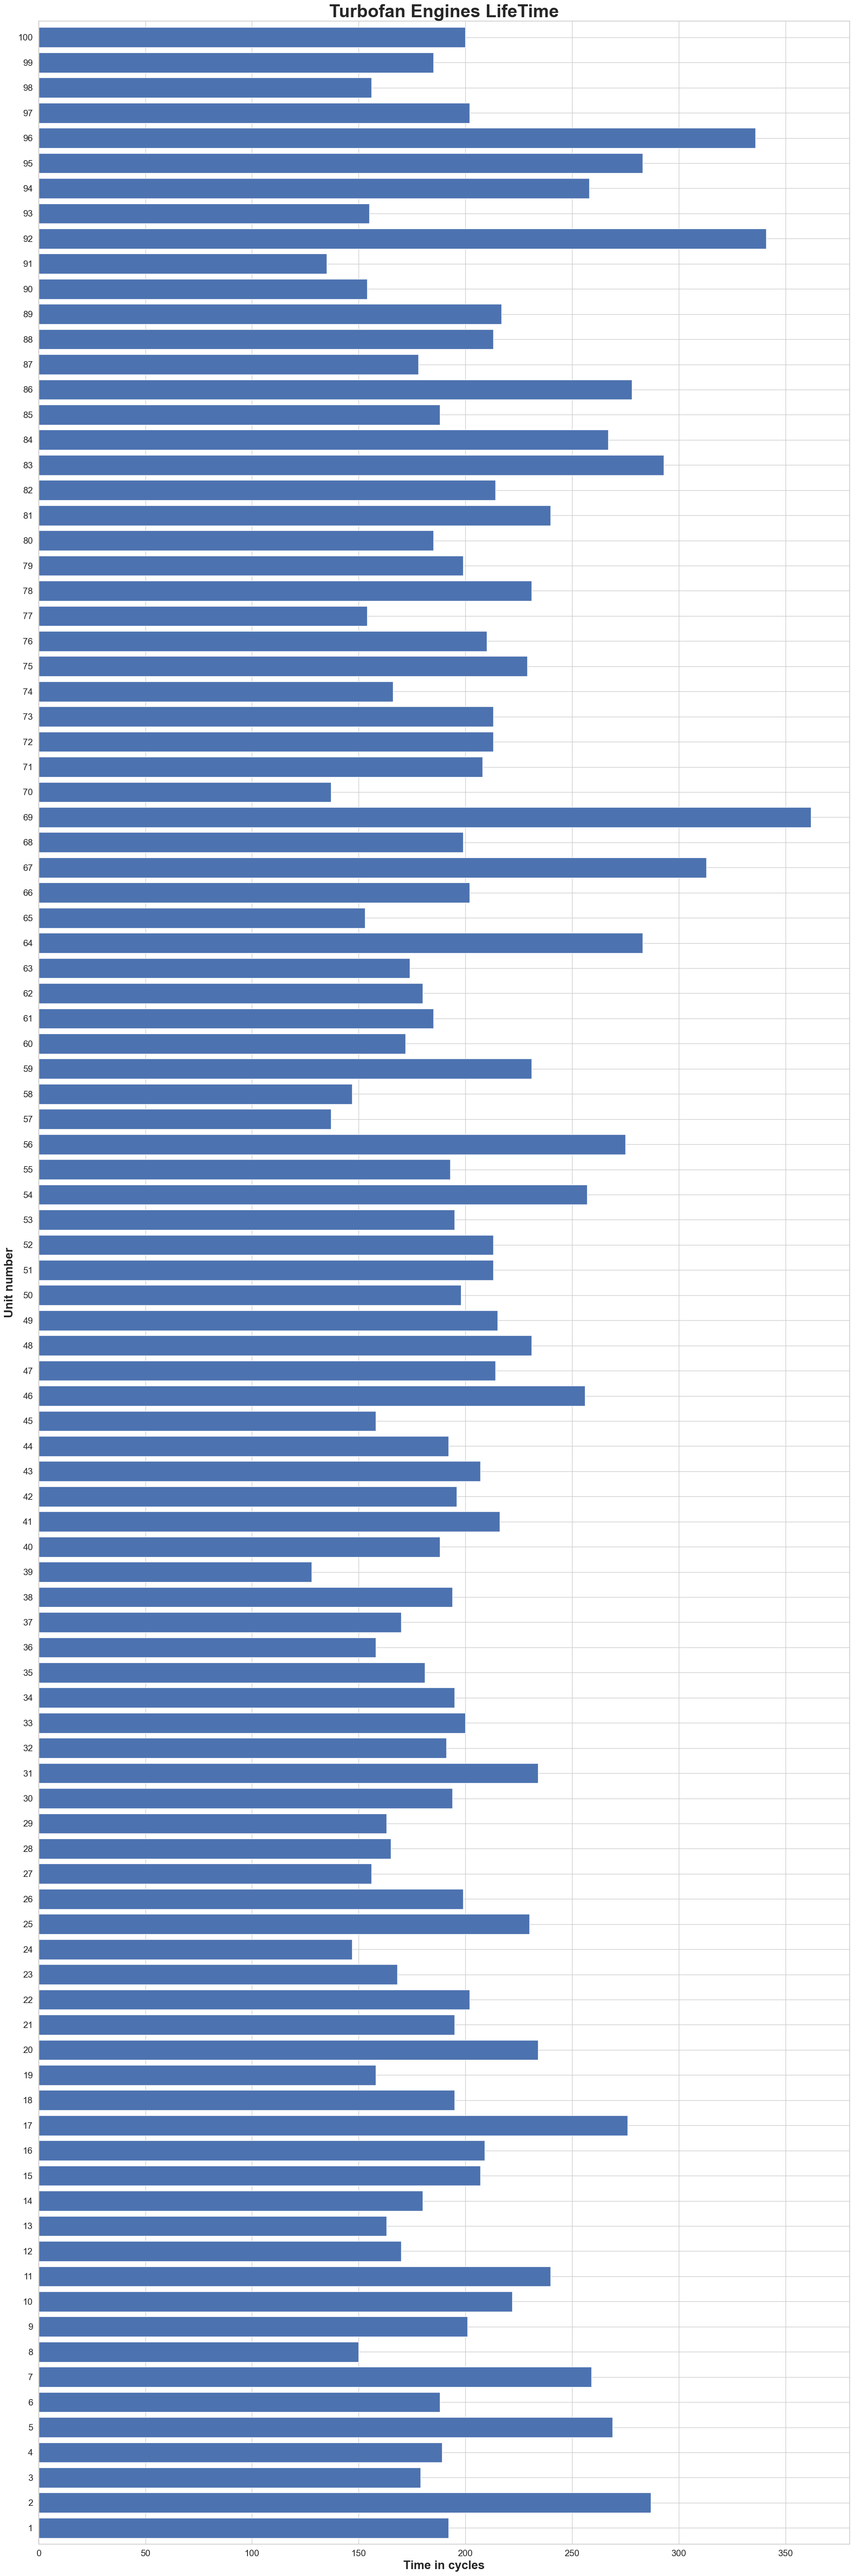

In [149]:
# plotting Turbofan Engines Lifetime
def plot_engines_lifetime(df, column_names):
    plt.figure(figsize=(20,60))
    ax=max_time_cycles['time_in_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
    plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
    plt.xlabel('Time in cycles',fontweight='bold',size=20)
    plt.xticks(size=15)
    plt.ylabel('Unit number',fontweight='bold',size=20)
    plt.yticks(size=15)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_engines_lifetime(max_time_cycles, 'time_in_cycles')

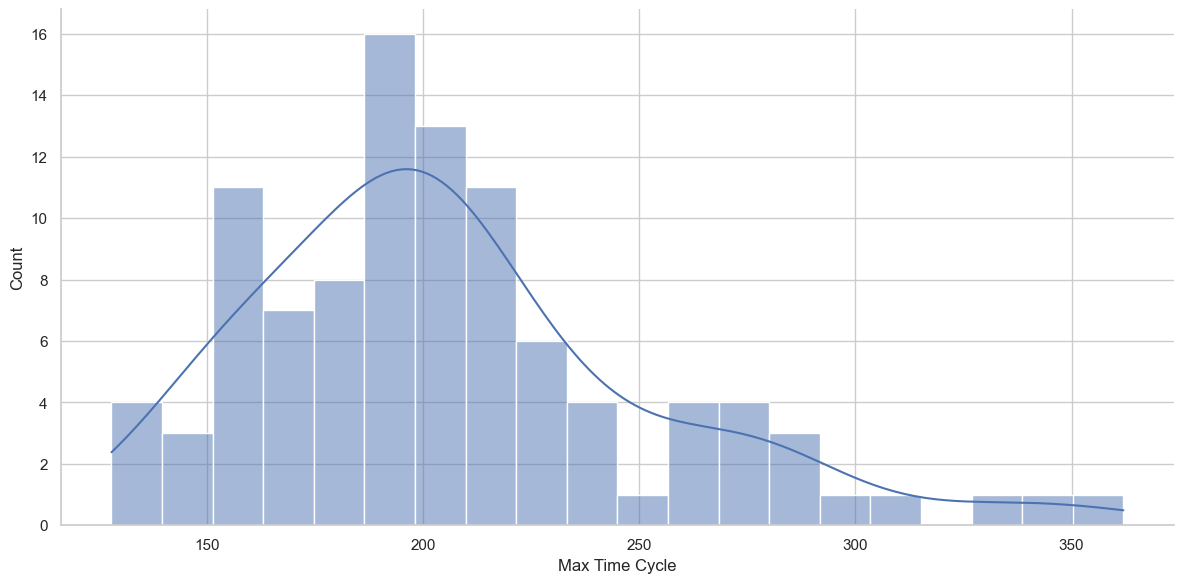

In [150]:
def plot_distribution(data, column, bins=20, height=6, aspect=2):

    # Create the distribution plot with KDE
    sns.displot(data[column], kde=True, bins=bins, height=height, aspect=aspect)
    plt.xlabel('Max Time Cycle')

    # Format x-axis ticks to display as integers
    ax = plt.gca()  # Get current axis
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

    plt.show()

plot_distribution(max_time_cycles, 'time_in_cycles', bins=20, height=6, aspect=2)

In [151]:
# Calculating RUL values
def calculate_RUL(df):
    train_grouped_by_unit = df.groupby(by='unit_number')
    max_time_cycles = train_grouped_by_unit['time_in_cycles'].max()
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_in_cycles']
    merged = merged.drop("max_time_cycle", axis=1)
    return merged

train_rul = calculate_RUL(train)
train_rul

,unit_number,time_in_cycles,setting_1,setting_2,setting_3,S_1,S_2,S_3,S_4,S_5,...,S_13,S_14,S_15,S_16,S_17,S_18,S_19,S_20,S_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [152]:
train_rul.loc[:,['RUL']].describe().transpose()


,count,mean,std,min,25%,50%,75%,max
RUL,20631.0,107.807862,68.88099,0.0,51.0,103.0,155.0,361.0


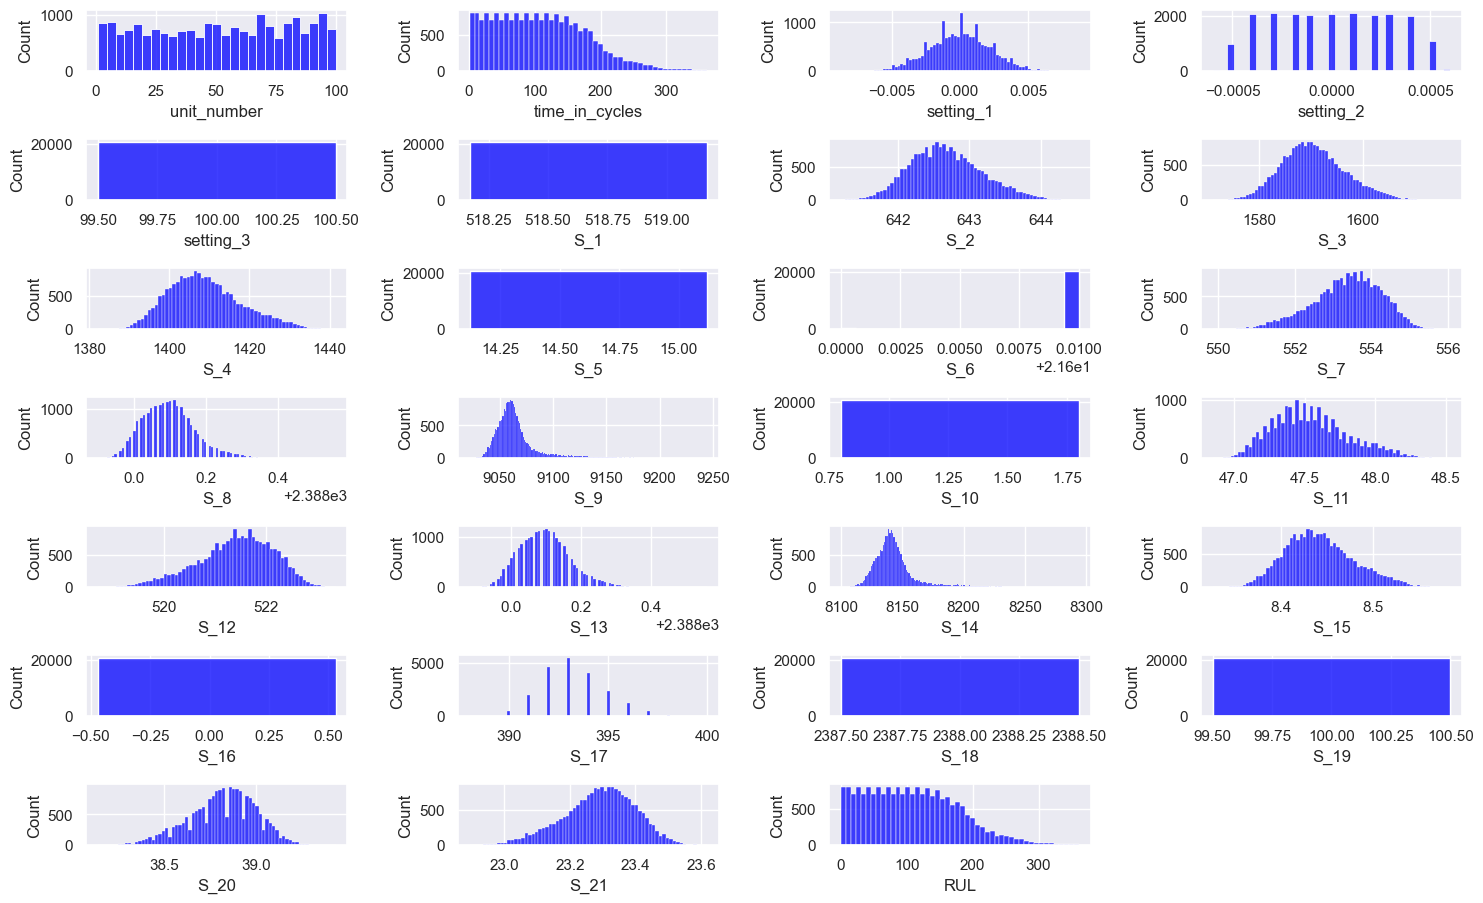

In [153]:
# Histogram representation of all Sensor data
def plot_sensor_histograms(df):
    sns.set()
    fig = plt.figure(figsize=[15, 10])
    cols = df.columns
    cnt = 1
    for col in cols:
        plt.subplot(8, 4, cnt)
        sns.histplot(df[col], color='blue')
        cnt += 1
    plt.tight_layout()
    plt.show()

# Example usage
plot_sensor_histograms(train_rul)

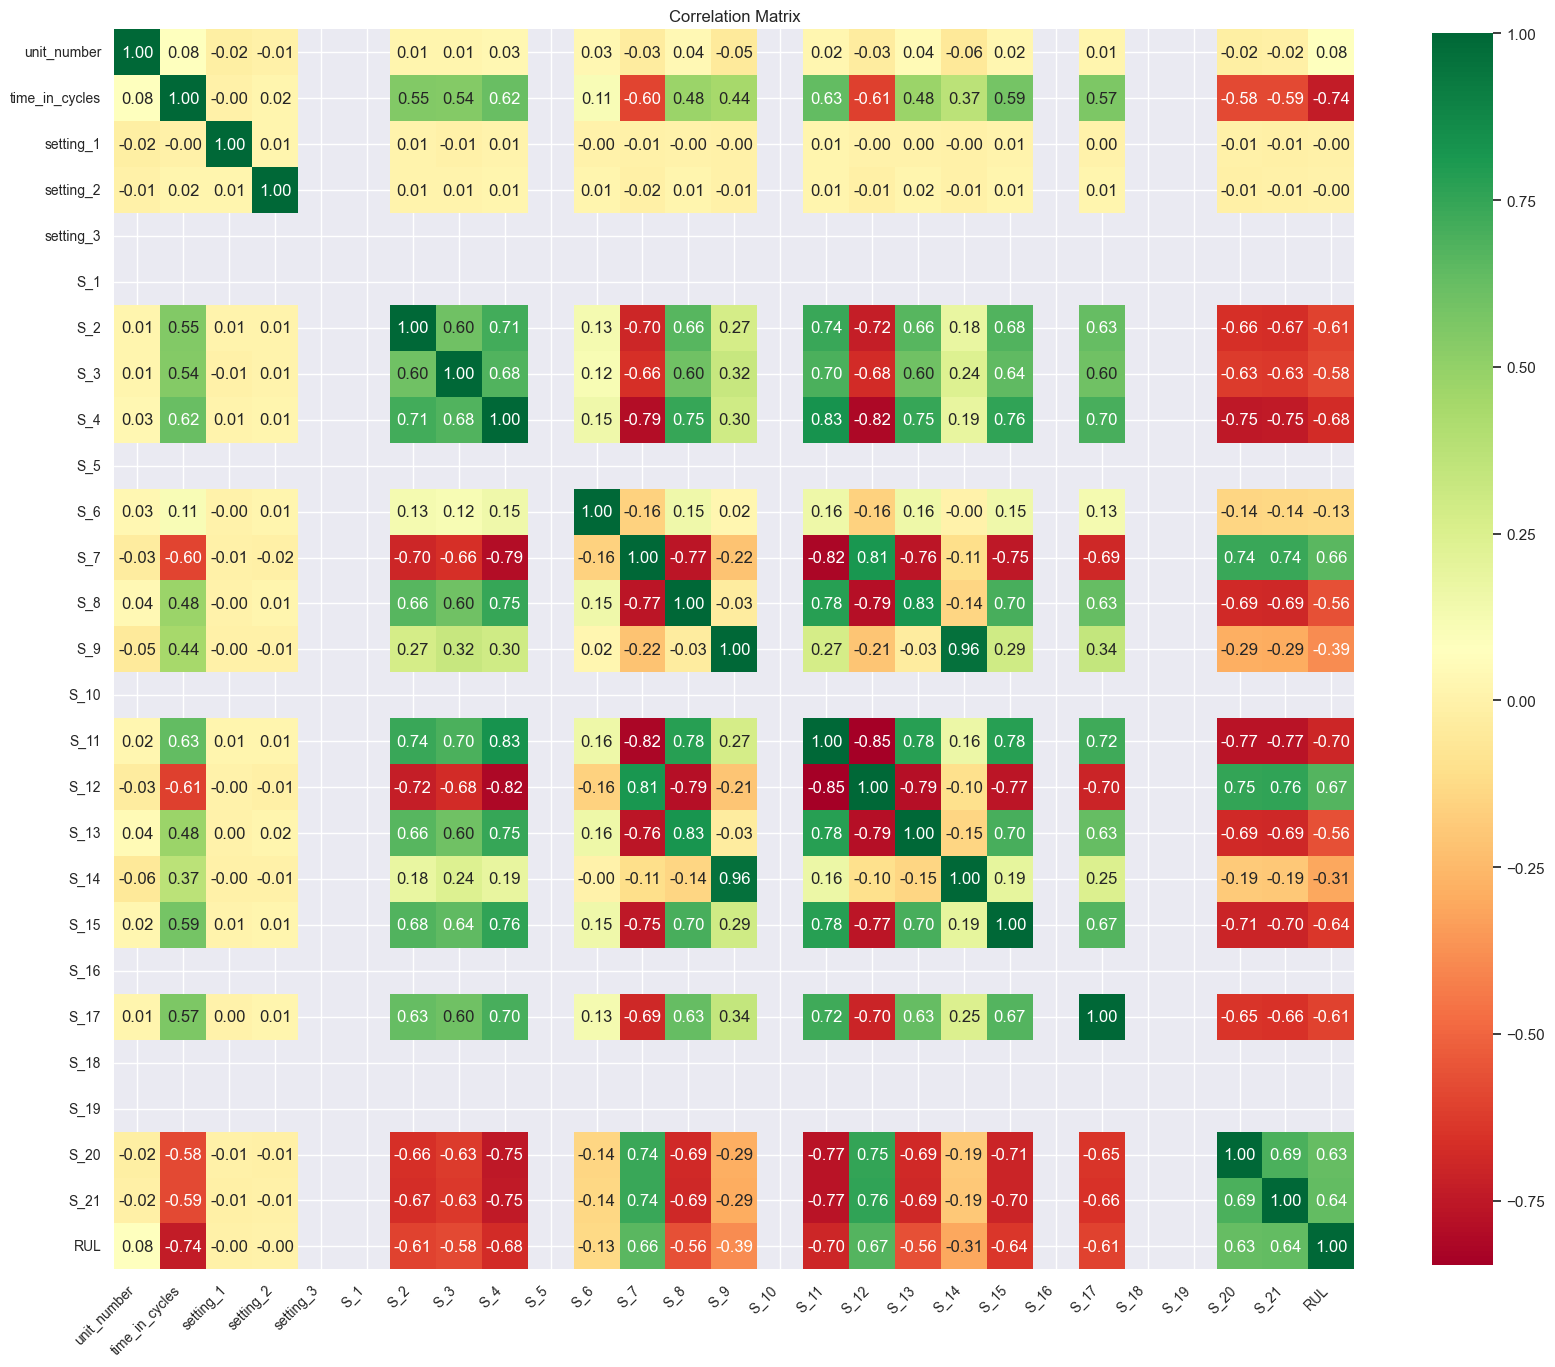

In [154]:
# Creating a heatmap to compare the features with RUL
def plot_heatmap(df):
    # Calculate the correlation matrix
    corr = df.corr()

    # Create a heatmap and annotate it
    plt.figure(figsize=(20, 20))  # Set the size of the figure directly
    sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt=".2f", square=True, cbar_kws={'shrink': .8})

    # Adding labels (assuming column names are appropriate to be used directly)
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels for better readability
    plt.yticks(fontsize=10)  # Adjust y labels fontsize if needed

    plt.title('Correlation Matrix')  # You can customize the title as needed
    plt.show()

# Example usage
plot_heatmap(train_rul)

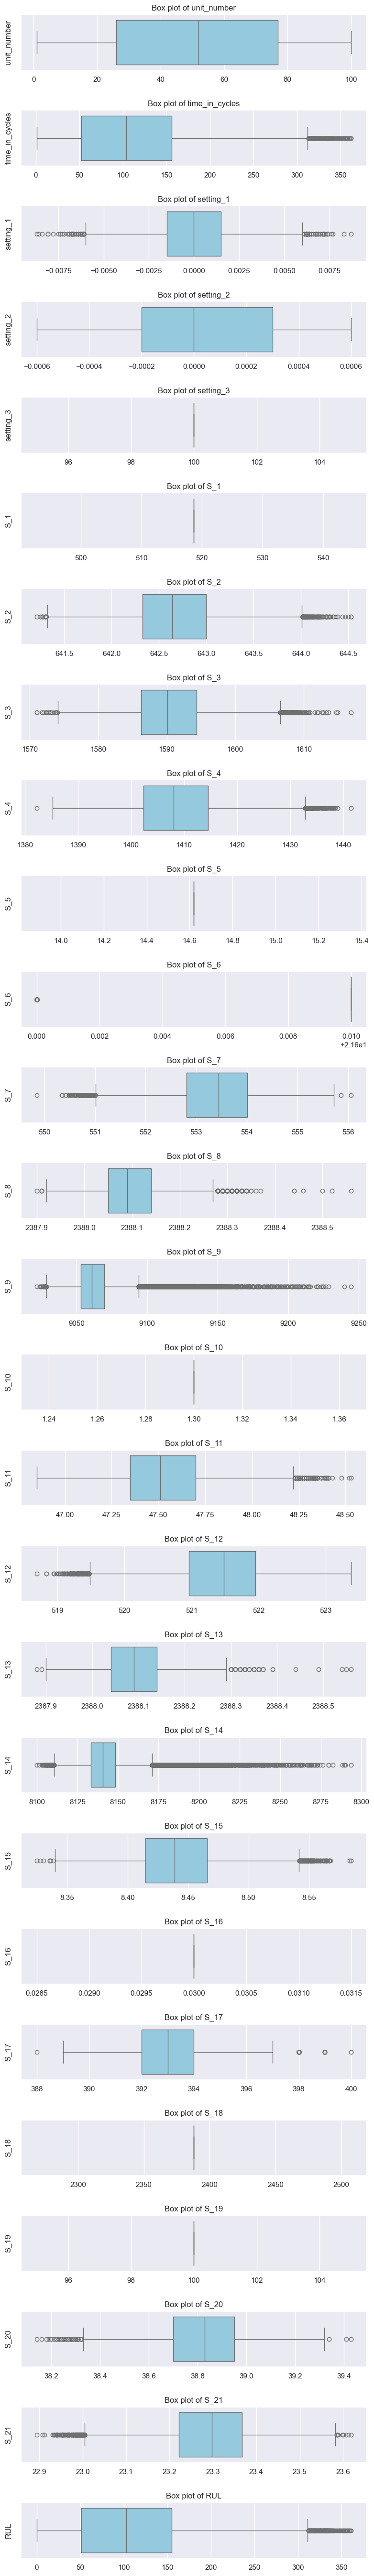

In [155]:
# Boxplot to visualize the outliers

def plot_boxplots(df):
    # Number of features (i.e., columns)
    num_features = len(df.columns)

    # Set up the matplotlib figure and axes
    fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(8, num_features * 2))

    # If only one feature, turn axes into a list
    if num_features == 1:
        axes = [axes]

    # Iterate through features and create box plots
    for ax, feature in zip(axes, df.columns):
        sns.boxplot(data=df, x=feature, ax=ax, color='skyblue')
        ax.set_title(f'Box plot of {feature}')
        ax.set_xlabel('')
        ax.set_ylabel(feature)

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage
plot_boxplots(train_rul)

In [156]:
# Calculation of New Correlation matrix 
def drop_unnecessary_columns(df, correlation_threshold=0):
    # Calculate the correlation matrix
    corr = df.corr()

    # Taking absolute value of the entire correlation matrix to consider both positive and negative correlations
    abs_corr = corr.abs()

    # Identifying columns that are weakly correlated across all variables (sum of correlations <= 1)
    cols_to_drop_by_sum = abs_corr.columns[abs_corr.sum() <= 1]

    # Focus specifically on the correlation with 'RUL'
    corr_with_rul = abs_corr['RUL']

    # Find columns with correlation to 'RUL' below the threshold
    cols_to_drop_by_rul = corr_with_rul[corr_with_rul < correlation_threshold].index.tolist()

    # Combine both lists of columns to drop, removing duplicates if any
    cols_to_drop = list(set(cols_to_drop_by_sum.tolist() + cols_to_drop_by_rul))

    # Ensure 'RUL' is not included in the drop list in case it's mistakenly caught by the threshold
    if 'RUL' in cols_to_drop:
        cols_to_drop.remove('RUL')

    # Dropping the low-correlated columns
    df_cleaned = df.drop(columns=cols_to_drop)

    return df_cleaned

train_rul_cleaned = drop_unnecessary_columns(train_rul)
train_rul_cleaned

,unit_number,time_in_cycles,setting_1,setting_2,S_2,S_3,S_4,S_6,S_7,S_8,S_9,S_11,S_12,S_13,S_14,S_15,S_17,S_20,S_21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


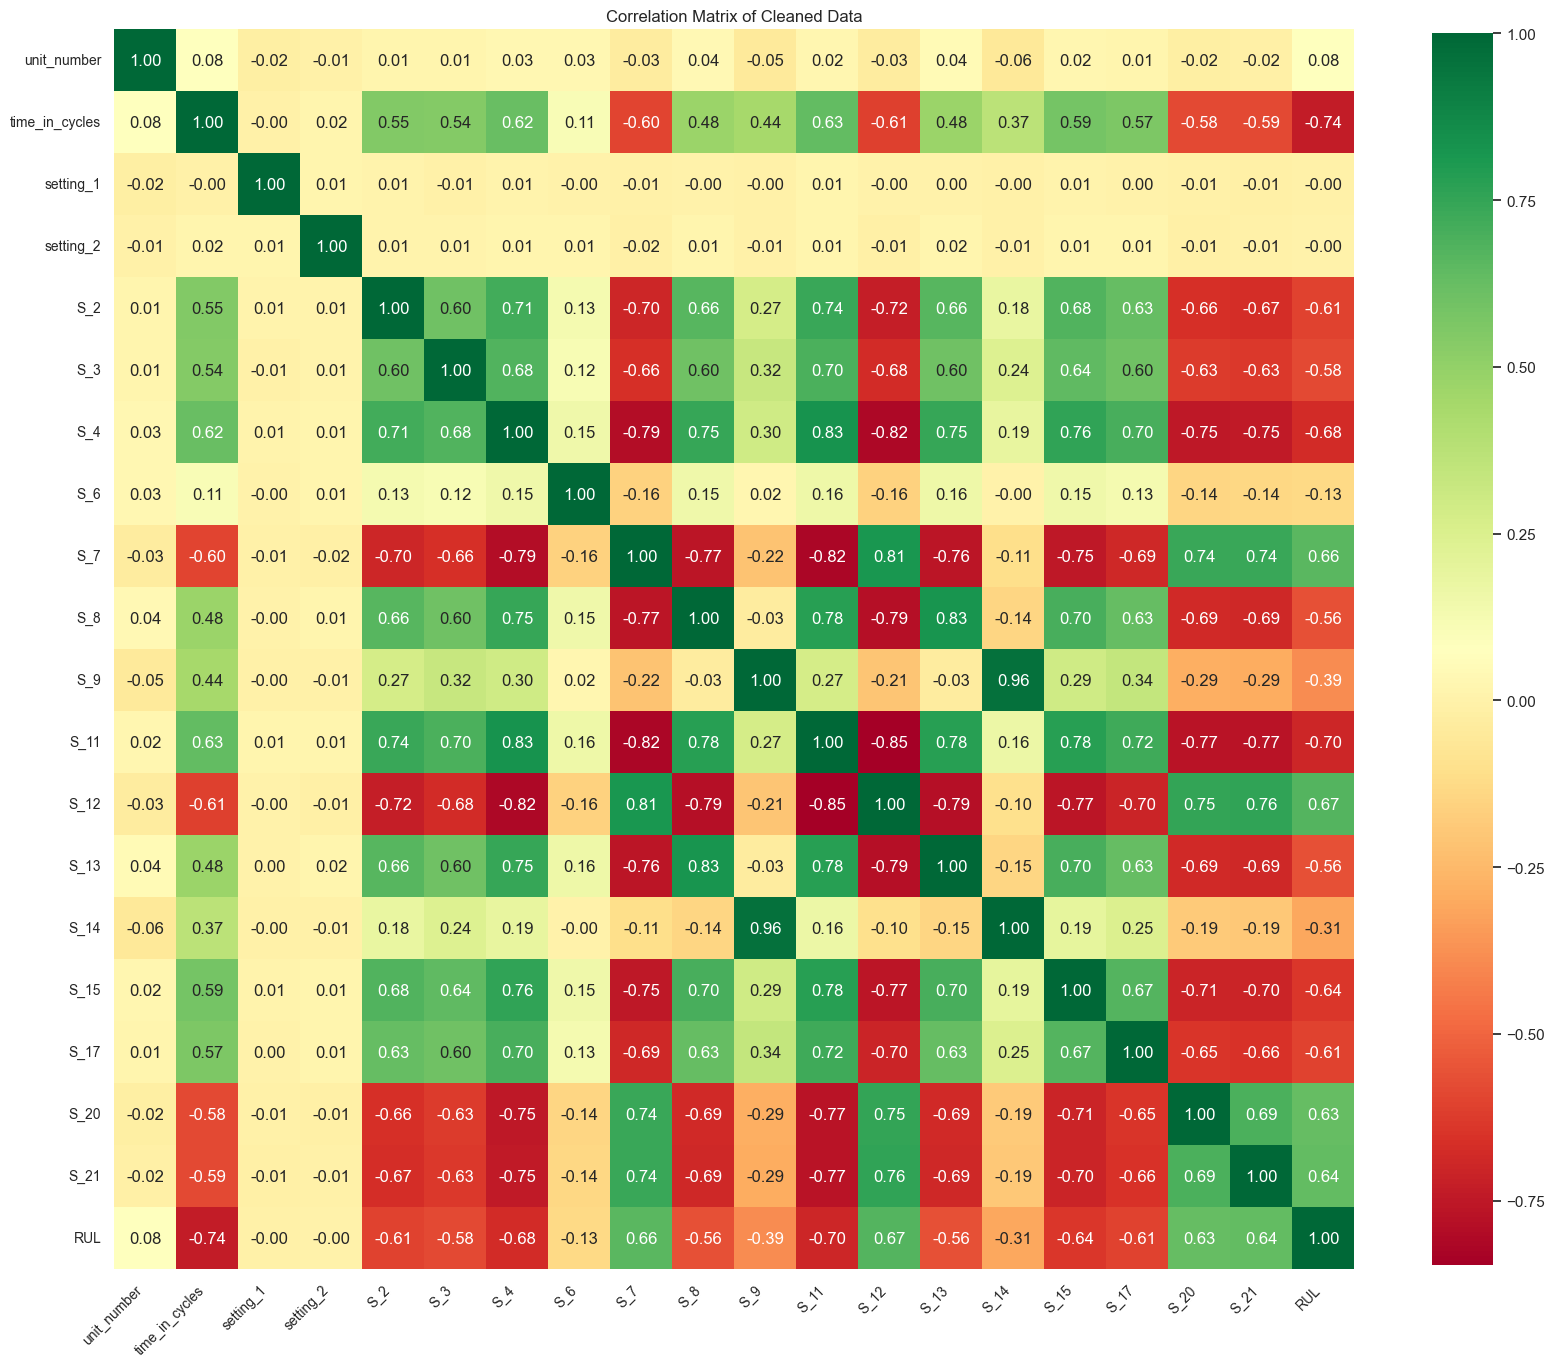

In [157]:
# Revised Heat map
def plot_cleaned_heatmap(df):
    # Creating a heatmap to compare with RUL
    corr = df.corr()

    # Create a heatmap and annotate it
    plt.figure(figsize=(20, 20))  # Set the size of the figure directly
    sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt=".2f", square=True, cbar_kws={'shrink': .8})

    # Adding labels (assuming column names are appropriate to be used directly)
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels for better readability
    plt.yticks(fontsize=10)  # Adjust y labels fontsize if needed

    plt.title('Correlation Matrix of Cleaned Data')  
    plt.show()

# Example usage
plot_cleaned_heatmap(train_rul_cleaned)

### DATA PREPROCESSING
Data preprocessing is a step in the data mining and data analysis process that takes raw data and transforms it into a format that can be understood and analyzed by computers and machine learning.                                                                                                                                                            
Let us Analyze the Test and rul data and also the train data after EDA is performed 

In [158]:
# Making of x_train and y_train from the Train dataset
""" From the above EDA we have obtained train_rul_cleaned dataset with rows being dropped and rul being calculated.
So, from this dataset we are going to obtain x_train and y_train which can be further used for Algorithm training. """

def create_x_y_train(df_cleaned):
    # Extract x_train by dropping the 'RUL' column
    x_train = df_cleaned.drop(columns=['RUL'])

    # Extract y_train containing only the 'RUL' column
    y_train = df_cleaned[['RUL']].copy()

    return x_train, y_train

# Example usage
x_train, y_train = create_x_y_train(train_rul_cleaned)

In [159]:
x_train

,unit_number,time_in_cycles,setting_1,setting_2,S_2,S_3,S_4,S_6,S_7,S_8,S_9,S_11,S_12,S_13,S_14,S_15,S_17,S_20,S_21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


In [160]:
y_train

,RUL
0,191
1,190
2,189
3,188
4,187
...,...
20626,4
20627,3
20628,2
20629,1


In [161]:
x_train.shape

(20631, 19)

In [162]:
x_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit_number,20631.0,51.506568,29.227633,1.0000,26.0000,52.0000,77.0000,100.0000
time_in_cycles,20631.0,108.807862,68.880990,1.0000,52.0000,104.0000,156.0000,362.0000
setting_1,20631.0,-0.000009,0.002187,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting_2,20631.0,0.000002,0.000293,-0.0006,-0.0002,0.0000,0.0003,0.0006
S_2,20631.0,642.680934,0.500053,641.2100,642.3250,642.6400,643.0000,644.5300
S_3,20631.0,1590.523119,6.131150,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
S_4,20631.0,1408.933782,9.000605,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
S_6,20631.0,21.609803,0.001389,21.6000,21.6100,21.6100,21.6100,21.6100
S_7,20631.0,553.367711,0.885092,549.8500,552.8100,553.4400,554.0100,556.0600
S_8,20631.0,2388.096652,0.070985,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600


In [163]:
y_train.shape

(20631, 1)

In [164]:
y_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RUL,20631.0,107.807862,68.88099,0.0,51.0,103.0,155.0,361.0


#### Making of x_test and y_test from test and rul datasets.
We donot have the RUL values of each time cycle for all the unit numbers in Test data.

In [165]:
def merge_rul_into_test(test_data, rul_df):
    # Assume each RUL value in RUL_df corresponds to the respective unit by their indices
    rul_df['unit_number'] = rul_df.index + 1  # Create a 'unit_number' column if it's aligned by index

    # Merge RUL values into the test data based on 'unit_number'
    merged_data = test_data.merge(rul_df, on='unit_number', how='left')

    # Calculate the maximum cycle number per unit to determine the last operational cycle
    merged_data['max_cycle'] = merged_data.groupby('unit_number')['time_in_cycles'].transform(max)

    # Calculate the RUL for each cycle as the difference between the last cycle and current cycle plus RUL at last cycle
    merged_data['RUL'] = (merged_data['max_cycle'] - merged_data['time_in_cycles']) + merged_data['RUL']

    # Cleanup by removing the temporary 'max_cycle' column
    merged_data.drop(columns=['max_cycle'], inplace=True)

    # Separate into RUL DataFrame and remaining columns DataFrame
    rul_values_df = merged_data[['RUL']].copy()
    remaining_columns_df = merged_data.drop(columns=['RUL'])

    # Drop columns from test data that are not present in x_train
    common_columns = [col for col in x_train.columns if col in remaining_columns_df.columns]
    x_test = remaining_columns_df[common_columns]  # Reorder columns as in x_train

    return rul_values_df, x_test

# Assuming 'test' and 'rul' are defined, we can call the function
y_test, x_test = merge_rul_into_test(test, rul)

In [166]:
x_test

,unit_number,time_in_cycles,setting_1,setting_2,S_2,S_3,S_4,S_6,S_7,S_8,S_9,S_11,S_12,S_13,S_14,S_15,S_17,S_20,S_21
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,643.24,1599.45,1415.79,21.61,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974
13092,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,21.61,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771
13093,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,21.61,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051
13094,100,197,-0.0038,0.0001,643.26,1594.99,1419.36,21.61,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699


In [167]:
x_test.shape

(13096, 19)

In [168]:
x_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit_number,13096.0,51.543907,28.289423,1.0000,28.0000,52.0000,76.0000,100.0000
time_in_cycles,13096.0,76.836515,53.057749,1.0000,33.0000,69.0000,113.0000,303.0000
setting_1,13096.0,-0.000011,0.002203,-0.0082,-0.0015,-0.0000,0.0015,0.0078
setting_2,13096.0,0.000004,0.000294,-0.0006,-0.0002,-0.0000,0.0003,0.0007
S_2,13096.0,642.475088,0.400899,641.1300,642.1975,642.4600,642.7400,644.3000
S_3,13096.0,1588.099204,5.003274,1569.0400,1584.6000,1587.9900,1591.3625,1607.5500
S_4,13096.0,1404.735362,6.688309,1384.3900,1399.9500,1404.4400,1409.0500,1433.3600
S_6,13096.0,21.609701,0.001704,21.6000,21.6100,21.6100,21.6100,21.6100
S_7,13096.0,553.757523,0.681286,550.8800,553.3100,553.8000,554.2400,555.8400
S_8,13096.0,2388.070964,0.057442,2387.8900,2388.0300,2388.0700,2388.1100,2388.3000


In [169]:
y_test

,RUL
0,142
1,141
2,140
3,139
4,138
...,...
13091,24
13092,23
13093,22
13094,21


In [170]:
y_test.shape

(13096, 1)

In [171]:
y_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RUL,13096.0,141.23847,58.980114,7.0,102.0,140.0,179.0,340.0


WHY scaling is done?


Select a scaling method:
1. Standard (Z-score normalization)
2. Min-Max
3. MaxAbs
4. Robust
Scaled Training Data:
       unit_number  time_in_cycles  setting_1  setting_2       S_2       S_3  \
0              0.0        0.000000   0.459770   0.166667  0.183735  0.406802   
1              0.0        0.002770   0.609195   0.250000  0.283133  0.453019   
2              0.0        0.005540   0.252874   0.750000  0.343373  0.369523   
3              0.0        0.008310   0.540230   0.500000  0.343373  0.256159   
4              0.0        0.011080   0.390805   0.333333  0.349398  0.257467   
...            ...             ...        ...        ...       ...       ...   
20626          1.0        0.540166   0.477011   0.250000  0.686747  0.587312   
20627          1.0        0.542936   0.408046   0.083333  0.701807  0.729453   
20628          1.0        0.545706   0.522989   0.500000  0.665663  0.684979   
20629          1.0        0.548476   0.436782   0.750000  0.608434  0.746021   
20630 

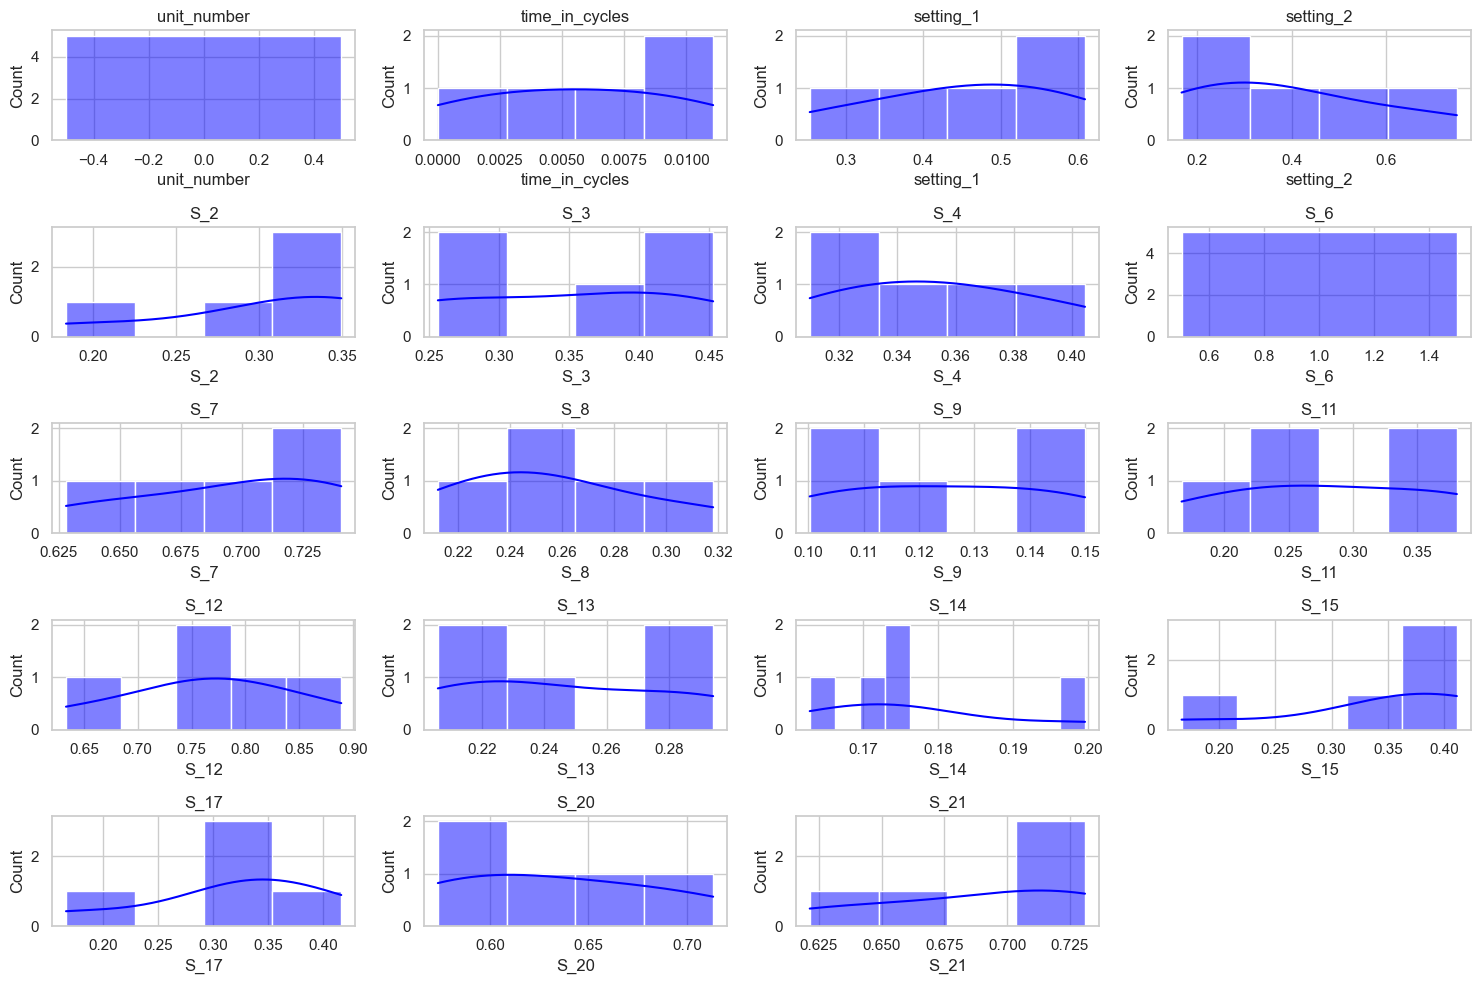

Testing Data - Scaled Histograms


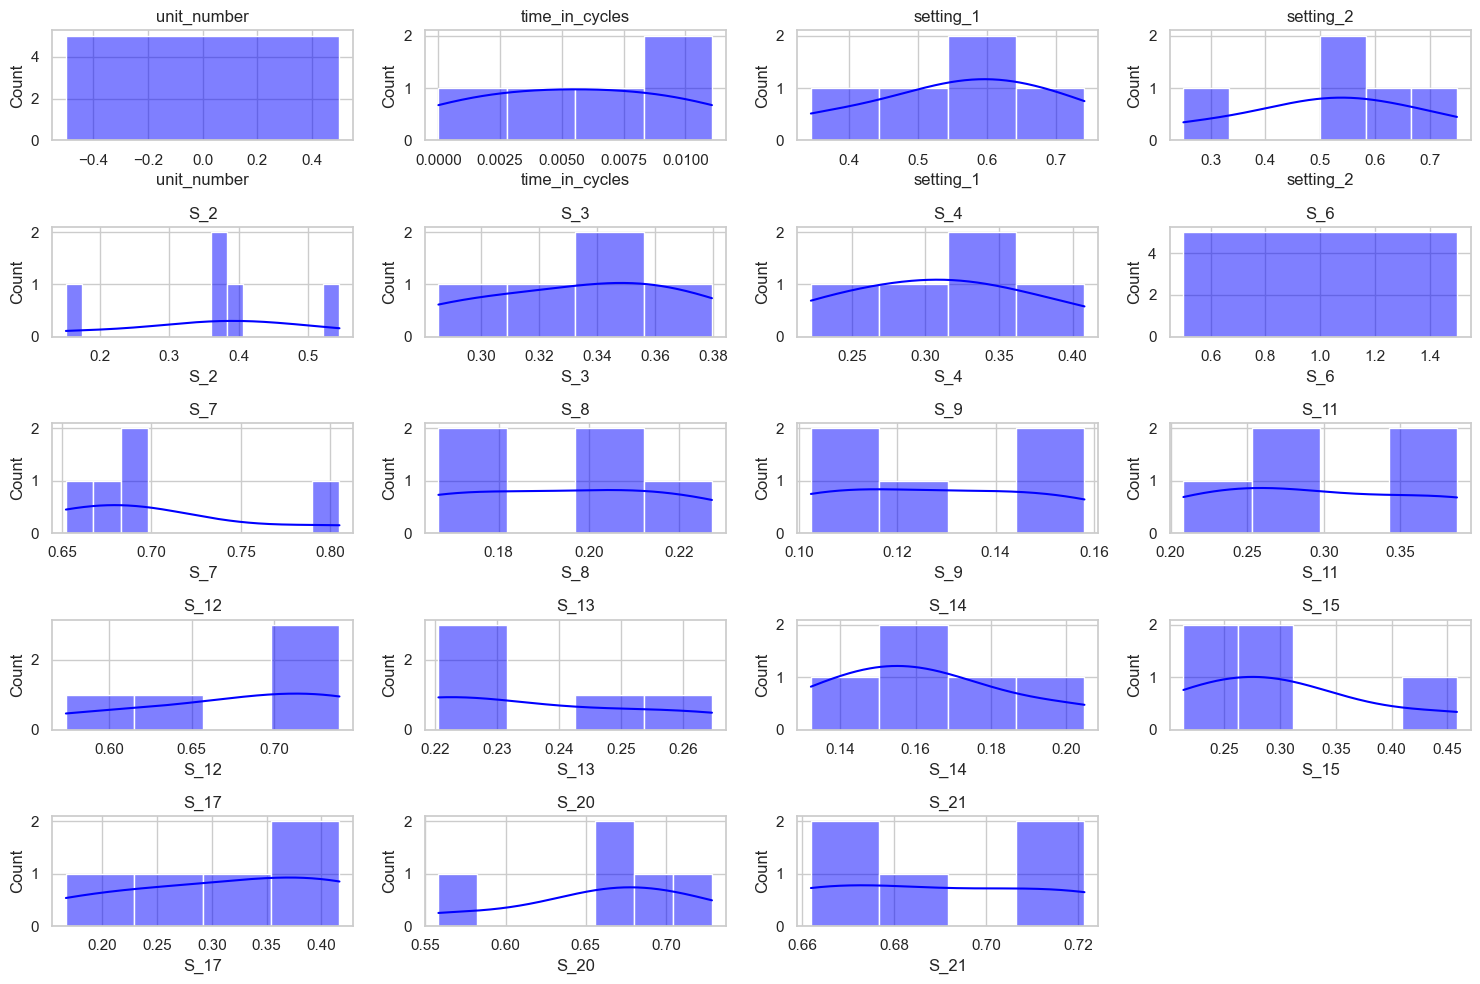

In [175]:
def scale_and_plot(x_train, x_test, method='standard', plot=True):
    scalers = {
        'standard': StandardScaler(),
        'minmax': MinMaxScaler(),
        'maxabs': MaxAbsScaler(),
        'robust': RobustScaler()
    }

    if method not in scalers:
        raise ValueError("Invalid scaling method. Choose 'standard', 'minmax', 'maxabs', or 'robust'.")

    scaler = scalers[method]
    scaler.fit(x_train)  # Fit on training data only
    
    x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns, index=x_train.index)
    x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns, index=x_test.index)

    print("Scaled Training Data:")
    print(x_train_scaled)
    print("Scaled Testing Data:")
    print(x_test_scaled)

    if plot:
        print("Training Data - Scaled Histograms")
        plot_sensor_histograms(x_train_scaled.head())
        print("Testing Data - Scaled Histograms")
        plot_sensor_histograms(x_test_scaled.head())

    return x_train_scaled, x_test_scaled

def plot_sensor_histograms(df):
    sns.set(style="whitegrid")
    fig = plt.figure(figsize=[15, 10])
    cols = df.columns
    cnt = 1
    total_plots = len(cols)
    rows = (total_plots // 4) + 1 if total_plots % 4 != 0 else total_plots // 4
    for col in cols:
        plt.subplot(rows, 4, cnt)
        sns.histplot(df[col], color='blue', kde=True)
        plt.title(col)
        cnt += 1
    plt.tight_layout()
    plt.show()

def main():

    # Prompt user for the choice of scaling method
    print("Select a scaling method:\n1. Standard (Z-score normalization)\n2. Min-Max\n3. MaxAbs\n4. Robust")
    choice = input("Enter your choice (standard, minmax, maxabs, robust): ").lower()


    if choice in ['standard', 'minmax', 'maxabs', 'robust']:
        x_train_scaled, x_test_scaled = scale_and_plot(x_train, x_test, method=choice)
        # Additional operations can be performed here
    else:
        print("Invalid choice, please select a valid scaling method.")

if __name__ == "__main__":
    main()